<a href="https://colab.research.google.com/github/photon149/TSF_DATASCIENCETASKS/blob/main/TSF_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SHIWANSH RAJ**

---
# TASK - 2 Prediction using Unsupervised ML
Dataset : Iris Dataset


Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Import Dataset 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [5]:
iris = pd.read_csv("/content/Iris (1).csv")

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Dropping ID Column as it is didnt play any role in our model

In [ ]:
iris.drop(['Id'],inplace=True,axis=1)

Checking for NULL Values

In [43]:
iris.isna().sum().to_frame('Null Vals')

,Null Vals
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [11]:
iris_outcome = pd.crosstab(index=iris['Species'],columns='count')

In [12]:
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [13]:
iris_setosa =iris.loc[iris["Species"]=='Iris-setosa']
iris_versicolor =iris.loc[iris["Species"]=='Iris-versicolor']
iris_virginica =iris.loc[iris["Species"]=='Iris-virginica']

In [14]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Data Visualisation

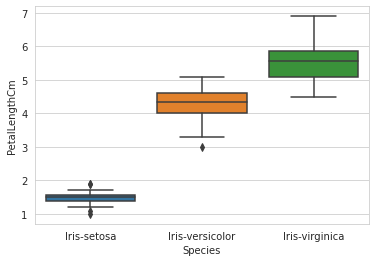

In [37]:
sns.boxplot(x='Species',y="PetalLengthCm",data=iris)
plt.show()

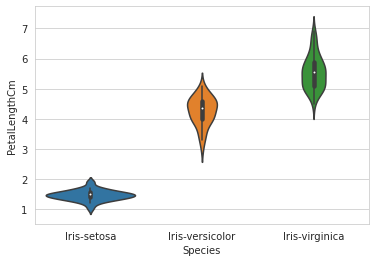

In [62]:
sns.violinplot(x='Species',y="PetalLengthCm",data=iris)
plt.show()

DATA CORRELATION

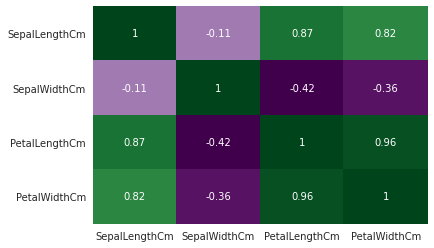

In [53]:
sns.heatmap(iris.corr(), cmap='PRGn', annot=True, 
            cbar=False)
plt.show()

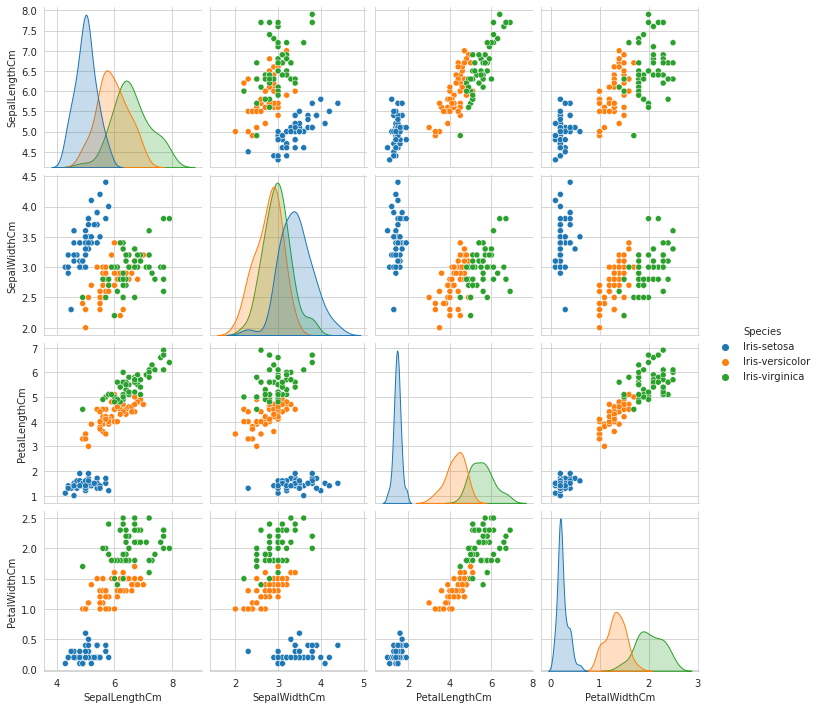

In [36]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue='Species')
plt.show()

In [32]:
x = iris.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++', random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

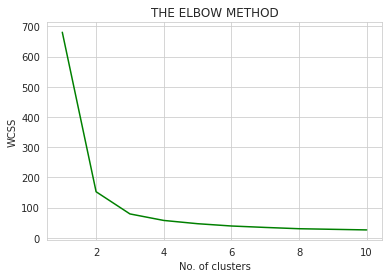

In [54]:
plt.plot(range(1,11),wcss,color='Green')
plt.title('THE ELBOW METHOD')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(x)

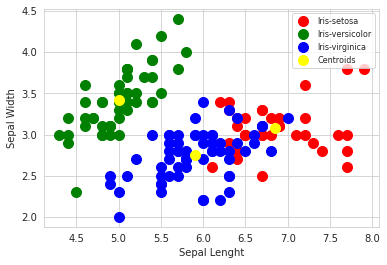

In [67]:
plt.scatter(x[y_kmeans == 0 , 0] , x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1 , 0] , x[y_kmeans==1,1],s=100,c='green',label='Iris-versicolor')
plt.scatter(x[y_kmeans == 2 , 0] , x[y_kmeans==2,1],s=100,c='blue',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal Width')
plt.legend(fontsize=8)
plt.show()

**THANKS**
